# Les 02

## Inleiding

Dit is de werkcollege-oefening bij Les 02 van het vak *Advanced Datamining* (BFVH4DMN2). Bestudeer eerst de syllabus behorende bij deze les. Op BlackBoard kun je naast dit iPython/Jupyter notebook een tweetal Python-bestanden vinden. Sla deze op in dezelfde folder als dit notebook. Het verdient aanbeveling om voor elke les een aparte folder aan te maken.

- **model.py** bevat een opzet voor een module met object-georiënteerde implementaties van neurale netwerk algoritmen. Het doel van deze oefening is om deze code aan te vullen en uit te werken tot een correct werkend model. Open dit bestand in een code-editor naar keuze. Vergeet niet om tijdens het uitwerken van deze oefening je aanpassingen in de editor telkens op te slaan voordat je de code in dit notebook uitvoert!

- **data.py** bevat een aantal functies die helpen bij het genereren en het visualiseren van de gebruikte datasets. Deze functies hoeven maar één keer ingelezen te worden en hoef je niet te wijzigen om deze opdracht correct uit te kunnen voeren. Laten we dus beginnen om deze functies te importeren: plaats de cursor in de cel hieronder en druk op Shift+Enter.

In [2]:
%matplotlib inline
import sys, model, data

De functie `generate()` van de module `data` produceert net als in Les 01 een verzameling willekeurige instances met continue attributen. Een boolean parameter geeft wederom aan of de dataset nominale uitkomsten dient te hebben t.b.v. classificatie (`nominal=True`) of continue uitkomsten t.b.v. regressie (`nominal=False`). De functie retourneert een lijst met vectoren die de attributen van de instances bevat en een lijst met klasselabels danwel getalwaarden die de bijbehorende uitkomsten bevat. In tegenstelling tot Les 01 zullen deze data niet langer per se lineair separabel hoeven te zijn of een exact lineair model volgen.

In [3]:
help(data.generate)
x = 1
print(x)

Help on function generate in module data:

generate(nominal, noise=0.0, num=64, dim=2, bias=None, weights=None)
    Generate a suitable dataset with attributes and outcomes.
    
    Keyword arguments:
    nominal  -- flag indicates nominal classes or continuous values
    noise    -- the amount of noise to add (default 0.0)
    num      -- number of instances (default 64)
    dim      -- dimensionality of the attributes (default 2)
    bias     -- bias of the generating model equation (default random)
    weights  -- weights of the generating model equation (default random)
    
    Return values:
    xs       -- values of the attributes
    ys       -- values of the labels

1


## Activatie- en loss-functies

Lineaire regressie maakt gebruik van de identiteitsfunctie als activatie-functie. Van het perceptron kennen we reeds de signum-functie. Logistische regressie benut een sigmoïde functie zoals de tangens hyperbolicus. Deze functies hebben één parameter en retourneren één getalwaarde. Het zijn daarmee relatief eenvoudige functies. Implementeer deze functies op de aangegeven plaats in de module met je model. Voel je vrij ook nog andere activatie-functies toe te voegen, zoals de softsign-functie en de logistische functie die ook wel voor logistische regressie worden gebruikt (zie bv. [Wikipedia](https://en.wikipedia.org/wiki/Activation_function) voor een uitgebreid overzicht).

Met de code hieronder kun je je activatie-functies weergeven. Hierbij wordt gebruik gemaakt van de `graph` functie die in de `data` module wordt gedefinieerd. Controleer dat alle door jou geïmplementeerde functies de juiste verwachte vorm hebben.

*Nota bene: de eerste twee regels van de code hieronder dienen om de meest recente versie van je module met het model opnieuw in te lezen nadat je deze opgeslagen hebt vanuit je editor.*

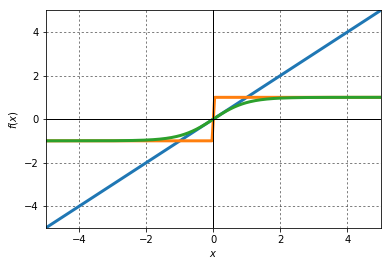

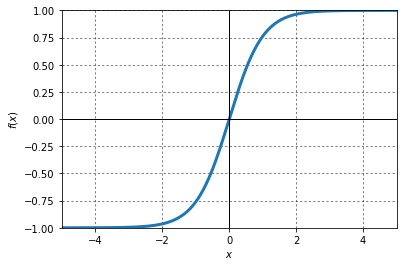

In [4]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

data.graph(identity_act_func, signum_act_func, tanh_act_func)
data.graph(tanh_act_func)

Hetzelfde kunnen we doen met de loss-functies. We zijn één loss-functie tegengekomen, de kwadratische loss-functie $L\left(\hat{y};y\right)=\frac{1}{2}\left(y-\hat{y}\right)^{2}$. Implementeer ook deze op de aangegeven plaats in je module. Voel je vrij andere varianten toe te voegen (bijvoorbeeld door niet het kwadraat maar de absolute waarde van de afwijking te nemen).

Geef met de code hieronder wederom de functie weer. De loss-functie heeft twee parameters ($\hat{y}$ en $y$), terwijl de `graph` functie een simpele functie met maar één parameter verwacht. Los dit op door gebruik te maken van een *anonieme*  lambda-functie.

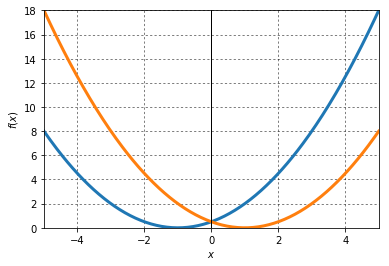

In [7]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

loss_func_neg = lambda yhat: quadratic_loss_func(yhat, -1.0)
loss_func_pos = lambda yhat: quadratic_loss_func(yhat, +1.0)
data.graph(loss_func_neg, loss_func_pos)

Tenslotte is het van belang dat we kunnen werken met de afgeleiden van diverse functies. Afgeleiden zijn analytisch te bepalen door te differentiëren, maar voor het gemak zullen we hier gebruik maken van numerieke afgeleiden die je bijvoorbeeld kunt bepalen met de formule:
\begin{equation*}
\frac{\partial y}{\partial x}\approx\frac{f\left(x+\Delta x\right)-f\left(x-\Delta x\right)}{2\Delta x}
\end{equation*}
De waarde van $\Delta x$ moet voldoende klein genomen worden om de benadering kloppend te laten zijn. Deze waarde moet in elk geval voldoende klein zijn opdat de functie op die kleine schaal glad en recht oogt. Aan de andere kant moet $\Delta x$ ook voldoende groot genomen worden opdat afrondfouten niet de overhand krijgen. Immers, er worden twee op elkaar lijkende uitkomsten van de functie $f$ van elkaar afgetrokken, en dit kleine getal wordt gedeeld door de eveneens kleine waarde van $\Delta x$.

Implementeer de bovenstaande formule in de vorm van een functie `derivative(func, x, *args, **kwargs)`. Deze dient de afgeleide te bepalen van een functie `func` ter plekke van het argument `x`. Omdat sommige functies ook nog andere parameters verwachten dient `derivative` dergelijke extra parameters te kunnen doorgeven. Gebruik hiervoor de `*args` en `**kwargs` argumenten.

Controleer dat de onderstaande code correct zowel de functie (in blauw) als diens afgeleide (in oranje) weergeeft.

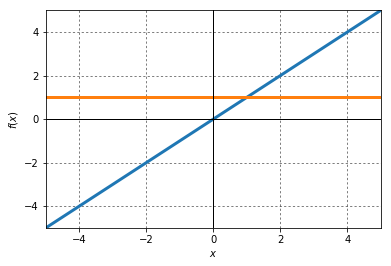

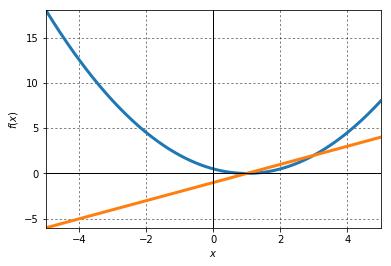

In [10]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

act_func = identity_act_func
act_grad = lambda x: derivative(act_func, x)
data.graph(act_func, act_grad)

y = +1.0
loss_func = lambda yhat: quadratic_loss_func(yhat, y)
loss_grad = lambda x: derivative(loss_func, x)
data.graph(loss_func, loss_grad)

## Lineaire Regressie

We gaan de implementatie van het perceptron en lineaire regressie uit Les 02 aanpassen. We zullen deze daarbij generaliseren tot één class genaamd `Neuron`. Deze class krijgt tijdens diens instantiatie parameters mee die bepalen wat de te gebruiken activatie- en loss-functies zullen zijn. Door hier geschikte waarden voor mee te geven kan met één en hetzelfde model dus zowel classificatie als regressie worden uitgevoerd!

Laten we een kijkje nemen naar de data. Die ziet er ongeveer hetzelfde uit als in de vorige les, maar dit keer kan er ruis aan worden toegevoegd die ervoor zorgt dat de data niet meer exact een lineair model volgen. Experimenteer met deze parameter om een idee te krijgen van diens effect.

In [ ]:
xs, ys = data.generate(nominal=False, noise=5.0)
data.plot(xs, ys)

We beginnen weer met het implementeren van de instantiatie-methode `__init__()`. We onderscheiden voor ons generieke model twee parameters:

- een *bias* $b$;

- een vector met *gewichten* $\boldsymbol{w}$.

Daarnaast zullen zoals gezegd de activatie- en loss-functies moeten worden toegekend.

De weergave-methode `__str__()` is reeds geïmplementeerd; je hoeft deze niet te veranderen, maar voel je vrij om de informatie over een object uit te breiden of anders weer te geven.

Als het goed is kun je nu zonder foutmeldingen een nieuw object instantiëren en weergeven. Controleer dat de bias en gewichten juist zijn geinitialiseerd.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_neuron = Neuron()
print(my_neuron)

De volgende stap is om de code te schrijven die voor een gegeven instance een voorspelling kan doen van de juiste uitkomst op grond van het model van het neuron:
\begin{equation*}
\hat{y}=\varphi\left(b+\sum_{i}w_{i}\cdot x_{i}\right)
\end{equation*}
waarin $\varphi$ de activatie-functie aangeeft. De methode `predict(self, x)` heeft een parameter die de attributen van een instance ontvangt en dient een waarde te retourneren die overeenkomt met het resultaat van de bovenstaande formule.

We voegen meteen ook een nieuwe methode `loss(self, x, y)` toe die de loss berekent van een instance en de bijbehorende voorspelling. Deze wordt bepaald middels $l=L\left(\hat{y};y\right)$.

Als je deze code correct hebt geïmplementeerd zou je hieronder de data gevisualiseerd moeten zien op soortgelijke wijze als hierboven. Omdat het model nog niet getraind is worden er geen betekenisvolle voorspellingen getoond. Wel zou de totale loss nu groter dan nul moeten zijn, zoals getoond in de linkerbenedenhoek. Als je geen foutmeldingen krijgt dan functioneert je model vooralsnog.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_neuron = Neuron()
data.plot(xs, ys, model=my_neuron)

Vervolgens gaan we het neuron trainen op grond van één instance met gegeven attributen en klasselabel. Gebruik hiervoor de update-regel:
\begin{equation*}
\left\{ \begin{array}{c}
b\leftarrow b+\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}\\
w_{i}\leftarrow w_{i}+\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}\cdot x_{i}
\end{array}\right.
\end{equation*}
De methode `train(self, x, y, alpha=0)` heeft naast de attributen en de uitkomst ook de learning rate als parameter. Deze heeft nu een default waarde $\alpha=0$, maar dit is niet zo zinvol. Vervang deze door een redelijkere waarde.

Na het trainen met één instance wordt het model nog maar weinig aangepast, maar als we een nogal grote learning rate $\alpha=0.1$ kiezen zou er toch een gradiënt in de achtergrond zichtbaar kunnen worden. De diagonale stippellijn geeft aan waar de voorspelling $\hat{y}=0$; deze scheidt dus de instances met een voorspelde positieve uitkomst van die met een voorspelde negatieve uitkomst.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_neuron = Neuron()
my_neuron.train(xs[0], ys[0], alpha=0.1)
data.plot(xs, ys, model=my_neuron)
print(my_neuron)

De laatste methode die geïmplementeerd dient te worden heet `fit(self, xs, ys, alpha=0, epochs=100)`. Deze dient de hele dataset te gebruiken om het neuron te trainen. Er dient een extra argument te worden meegegeven dat het aantal te draaien epochs definieert; default draaien we er 100. Pas ook de standaardwaarde van de learning rate $aplha$ weer aan.

Draai de code hieronder. Slaagt je model erin om te convergeren naar een uitkomst die de echte getalwaarden van de instances ogenschijnlijk goed voorspelt? Is de loss afgenomen?

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

my_neuron = Neuron()
my_neuron.fit(xs, ys)
data.plot(xs, ys, model=my_neuron)
print(my_neuron)

Als het goed is kan je code eenvoudig aangepast worden om er classificatie mee uit te voeren in plaats van regressie. We hoeven daartoe alleen de activatie-functie te veranderen. Kijk of de onderstaande code ook goed functioneert. Merk op dat als je de `noise` parameter ongelijk aan nul kiest, dat dan de data niet per se lineair separabel zullen zijn! Een belangrijk verschil tussen logistische regressie en het perceptron is verder dat er dit keer een probabilistische classificatie wordt uitgevoerd: de classificatie-grens toont dan een geleidelijke overgang in plaats van een scherpe grens.

In [ ]:
del sys.modules['model']   # Unload the old model version
from model import *        # Reload the new model version

xs, ys = data.generate(nominal=True, noise=5.0)
my_neuron = Neuron(act_func=tanh_act_func)
my_neuron.fit(xs, ys)
data.plot(xs, ys, model=my_neuron)
print(my_neuron)

**Gefeliciteerd!** Je hebt nu één enkel algoritme geïmplementeerd dat zowel classificatie als regressie kan uitvoeren.

Experimenteer weer hoe het algoritme zich gedraagt. Bijvoorbeeld:

- Hoe gevoelig is de uitkomst voor de waarde van de `noise`-parameter?

- Hoe goed werken andere vormen van activatie- en/of loss-functies?